
<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سری چهارم تمارین عملی درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر مریم امیر مزلقانی
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: محمد چوپان  
    </h5>
<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    <a href="mailto:Aut.DataMining.Fall@gmail.com">Aut.DataMining.Fall@gmail.com</a>
</p>


<div dir="rtl">
    
<p dir=rtl style="font-size: 16;line-height:100%;font-family:vazir;color:red;direction:rtl">
لطفا خواسته های تمرین را در بخش خودش انجام دهید.
</p>
</div>

# HW4

## Imports 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

## Load Dataset

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این قسمت دیتاست کشور ها را با استفاده از کتابخانه pandas بخوانید. 
</font>
</p>
</div>

In [39]:
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Feature engineering

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت شما باید با استفاده از رسم نمودار های مختلف همانند نمودار جعبه ای و یا نقشه گرمایی داده ها را تحلیل کنید.
حداقل 5 نمودار مختلف را رسم کنید.
</font>
</p>
</div>

/opt/homebrew/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

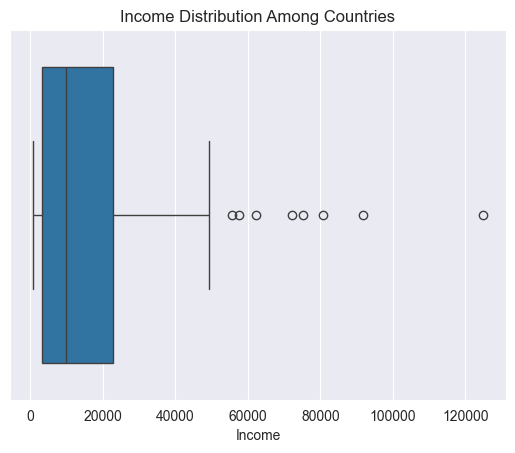

In [40]:
sns.boxplot(x=country_df["income"])
plt.title('Income Distribution Among Countries')
plt.xlabel('Income')
plt.show()

/var/folders/0d/6qzn86l106lfwvfv5v_yjgc00000gn/T/ipykernel_26668/3437586906.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(country_df.corr(), annot=True, cmap='coolwarm')


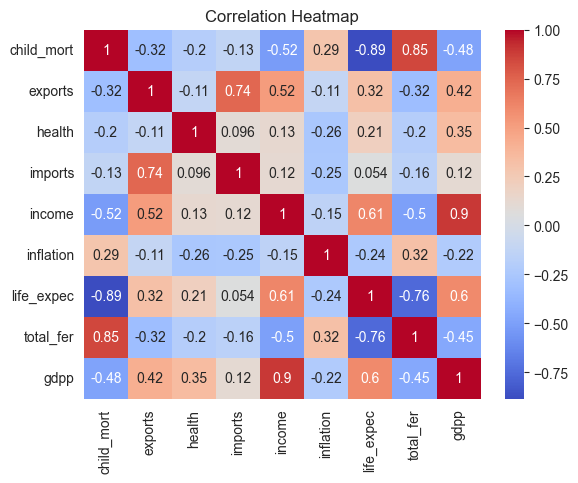

In [41]:
sns.heatmap(country_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show() 

/opt/homebrew/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


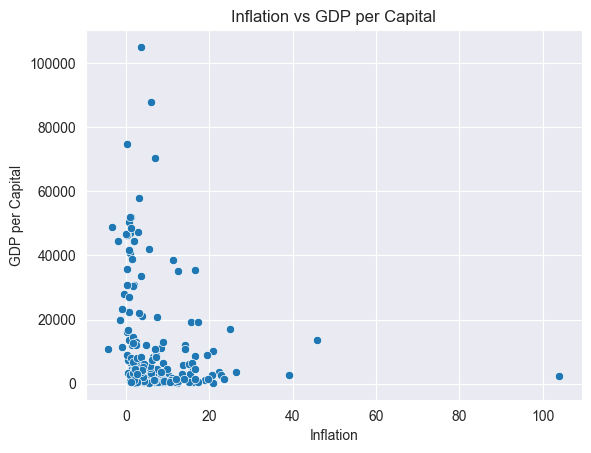

In [42]:
sns.scatterplot(x='inflation', y='gdpp', data=country_df)
plt.title('Inflation vs GDP per Capital')
plt.xlabel('Inflation')
plt.ylabel('GDP per Capital')
plt.show()

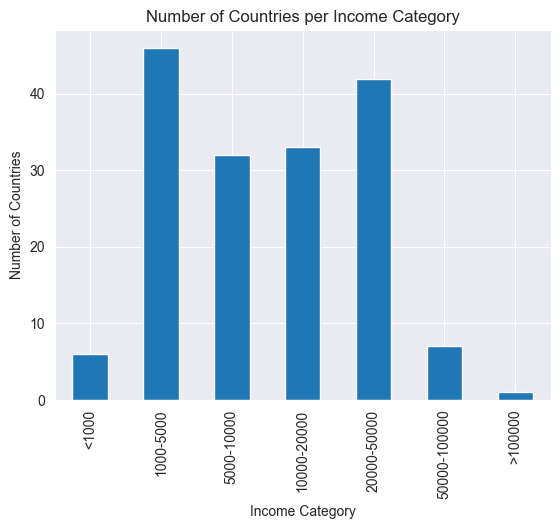

In [43]:
income_categories = pd.cut(country_df['income'], bins=[0, 1000, 5000, 10000, 20000, 50000, 100000, 200000], 
                           labels=['<1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000', '50000-100000', '>100000'])
income_counts = income_categories.value_counts().sort_index()
income_counts.plot(kind='bar')
plt.title('Number of Countries per Income Category')
plt.xlabel('Income Category')
plt.ylabel('Number of Countries')
plt.show()

/opt/homebrew/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


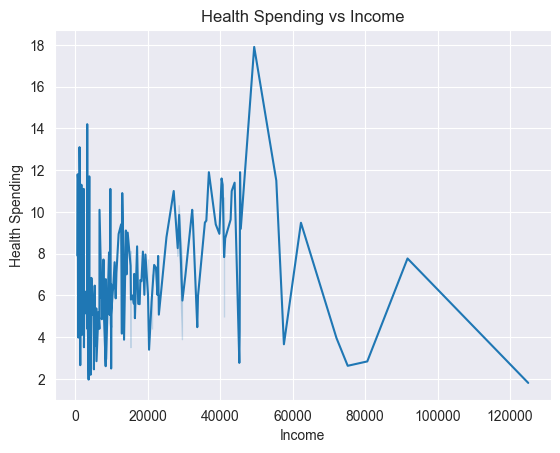

In [44]:
sns.lineplot(x='income', y='health', data=country_df)
plt.title('Health Spending vs Income')
plt.xlabel('Income')
plt.ylabel('Health Spending')
plt.show()

### PCA

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
داده های خود را با استفاده از الگوریتم PCA به 2 بعد کاهش دهید.دقت کنید که به داده های اصلی نیاز داریم. پس حتما آن ها را ذخیره کنید.
</font>
</p>
</div>

Explained Variance Ratio: [0.4595174  0.17181626]


/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common

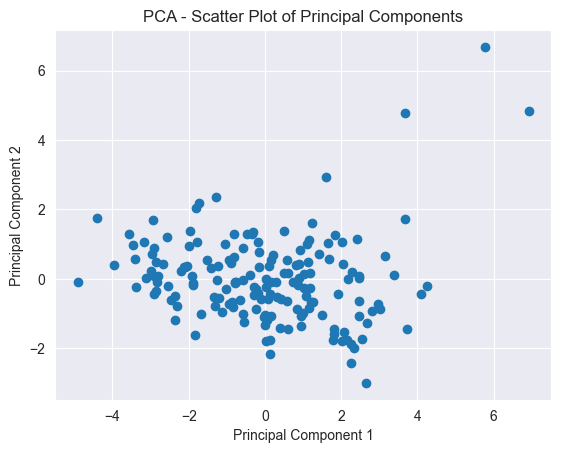

,PC1,PC2,country
0,-2.913025,0.095621,Afghanistan
1,0.429911,-0.588156,Albania
2,-0.285225,-0.455174,Algeria
3,-2.932423,1.695555,Angola
4,1.033576,0.136659,Antigua and Barbuda


In [45]:
features = country_df.columns.difference(['country'])
data_for_pca = country_df[features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# 3. PCA Computation
num_components = 2  
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(scaled_data)

# 4. Result Analysis
# Print Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_var_ratio)

# Scatter Plot of Principal Components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA - Scatter Plot of Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 5. Dataframe Creation
pc_df = pd.DataFrame(data=principal_components, 
                     columns=[f'PC{i}' for i in range(1, num_components + 1)])
pc_df['country'] = country_df['country']

pc_df.head()

## Clustering

### Similarity

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> در این مرحله نیاز است که ماتریس شباهت دادگان را به دست آورید.برای هر یک از داده ها برداری از ویژگی هایش را در نظر گرفته  و ماتریس شباهت رابرای کل  دیتاست به دست آورید.برای معیار شباهت نیز یک بار از فاصله اقلیدسی و یک بار از شباهت کوسینوسی کمک بگیرید.
این کار را هم برای داده های کاهش داده شده و هم برای داده های اصلی انجام دهید.
</font>
</p>
</div> 

In [46]:
# 2. Data Preparation
# Assuming country_df is already loaded
features = country_df.columns.difference(['country'])
data_for_distance = country_df[features]

# 3. Compute Distance and Similarity Matrices
distance_matrix = euclidean_distances(data_for_distance)
similarity_matrix = cosine_similarity(data_for_distance)

# 4. Create DataFrames
euclidean_distance_df = pd.DataFrame(data=distance_matrix, 
                                     index=country_df['country'], 
                                     columns=country_df['country'])

cosine_similarity_df = pd.DataFrame(data=similarity_matrix, 
                                    index=country_df['country'], 
                                    columns=country_df['country'])

# Display the Cosine Similarity DataFrame
cosine_similarity_df.head()

/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.000000,0.996292,0.998012,0.977288,0.969849,0.983016,0.991390,0.841806,0.877703,0.997776,...,0.974734,0.880118,0.900844,0.959782,0.998504,0.895898,0.935691,0.997501,0.997734,0.995359
Albania,0.996292,1.000000,0.998324,0.988851,0.984242,0.993635,0.998354,0.874297,0.906538,0.999160,...,0.987938,0.908681,0.926971,0.976479,0.997036,0.921721,0.956782,0.994096,0.994260,0.999300
Algeria,0.998012,0.998324,1.000000,0.978650,0.972383,0.985480,0.993364,0.844792,0.880635,0.999852,...,0.977356,0.883043,0.903753,0.962394,0.999746,0.897749,0.938386,0.998555,0.998712,0.995997
Angola,0.977288,0.988851,0.978650,1.000000,0.999379,0.999159,0.995715,0.936274,0.958801,0.982004,...,0.999750,0.960234,0.972048,0.997433,0.974847,0.968927,0.989087,0.967431,0.967721,0.992730
Antigua and Barbuda,0.969849,0.984242,0.972383,0.999379,1.000000,0.997888,0.992729,0.946345,0.966893,0.976232,...,0.999745,0.968183,0.978696,0.999217,0.967852,0.975645,0.993123,0.959523,0.959806,0.988451


In [47]:
# 1. Select Features
features = pc_df.columns.difference(['country'])
data_for_distance = pc_df[features]

# 2. Compute Distance and Similarity Matrices
distance_matrix = euclidean_distances(data_for_distance)
similarity_matrix = cosine_similarity(data_for_distance)

# 3. Create DataFrames for Distance and Similarity
euclidean_distance_pca_df = pd.DataFrame(data=distance_matrix, 
                                         index=pc_df['country'], 
                                         columns=pc_df['country'])
cosine_similarity_pca_df = pd.DataFrame(data=similarity_matrix, 
                                        index=pc_df['country'], 
                                        columns=pc_df['country'])

# Display the Euclidean Distance DataFrame
euclidean_distance_pca_df.head()

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000000,3.412150,2.684903,1.600052,3.946814,3.483054,2.888759,5.653353,5.945056,2.776650,...,5.443612,5.241226,6.357360,3.846070,2.191844,2.161942,2.710458,3.649111,1.045876,0.393436
Albania,3.412150,0.000000,0.727395,4.064557,0.943274,1.258815,0.531868,2.370140,2.548069,0.638859,...,2.648852,1.892197,3.270185,0.862916,1.285153,1.752475,1.174404,1.980089,2.366289,3.464690
Algeria,2.684903,0.727395,0.000000,3.410761,1.445511,1.359281,0.215663,3.042062,3.270953,0.116180,...,3.152672,2.589270,3.876432,1.328830,0.602241,1.218657,0.822829,2.005412,1.639101,2.745217
Angola,1.600052,4.064557,3.410761,0.000000,4.261373,4.561233,3.624703,6.433757,6.386636,3.459916,...,5.387075,5.953372,7.286208,4.729979,3.137593,2.361095,3.775266,3.444460,2.085670,1.211487
Antigua and Barbuda,3.946814,0.943274,1.445511,4.261373,0.000000,2.166316,1.336221,2.495702,2.126870,1.329460,...,1.724112,1.966088,3.522297,1.621478,2.046234,1.921198,2.095086,1.363455,2.931377,3.913264


### Kmeans

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> بعد از پیاده سازی ماتریش شباهت باید در این مرحله الگوریتم Kmeans را پیاده سازی کنید.دقت کنید استفاده از 
    .
کتابخانه های  آماده مجاز نیست. همچنین مراکز اولیه باید به صورت تصادفی انتخاب شود و تعداد خوشه ها را نیز به صورت بهینه انتتخاب کنید
الگوریتم را تا  زمانی ادامه دهید که به دقت مناسبی برسد.
دقت کنید مجدد خوشه بندی را برای هر دو داده کاهش داده شده و اصلی باید انجام دهید.
</font>
</p>
</div> 

/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common

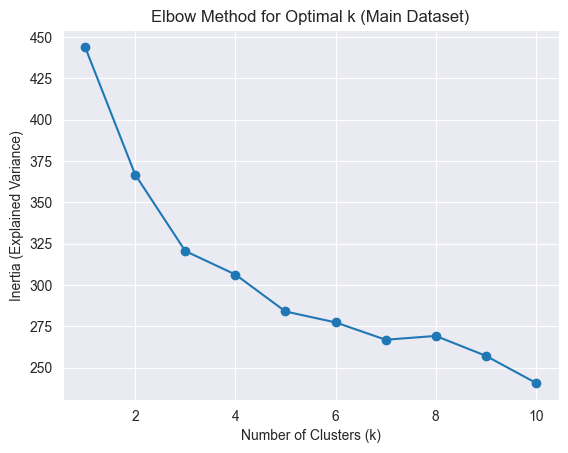

In [48]:
# 1. Define K-means Functions
def initialize_centroids(data, k):
    """Randomly initialize centroids."""
    centroids_indices = np.random.choice(len(data), k, replace=False)
    centroids = data[centroids_indices]
    return centroids

def euclidean_distance(data, centroids):
    """Calculate the Euclidean distance between each data point and centroids."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return distances

def assign_to_clusters(data, centroids):
    """Assign data points to the closest centroids."""
    distances = euclidean_distance(data, centroids)
    clusters = np.argmin(distances, axis=1)
    return clusters

def update_centroids(data, clusters, k):
    """Update centroids to the mean of the assigned data points."""
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if cluster_points.size:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def kmeans(data, k, max_iterations=5000, epsilon=1e-6):
    """K-means clustering algorithm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        clusters = assign_to_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.linalg.norm(new_centroids - centroids) < epsilon:
            break
        centroids = new_centroids
    return clusters, centroids

# 2. Apply K-means to Dataset
features = country_df.columns.difference(['country'])
data_for_kmeans = country_df[features]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_kmeans)

k_values = range(1, 11)
inertia_values = []

for k in k_values:
    _, centroids = kmeans(scaled_data, k)
    inertia = np.sum(np.min(np.linalg.norm(scaled_data[:, np.newaxis] - centroids, axis=2), axis=1))
    inertia_values.append(inertia)

# 3. Plot Results with Elbow Method
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k (Main Dataset)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Explained Variance)')
plt.show()

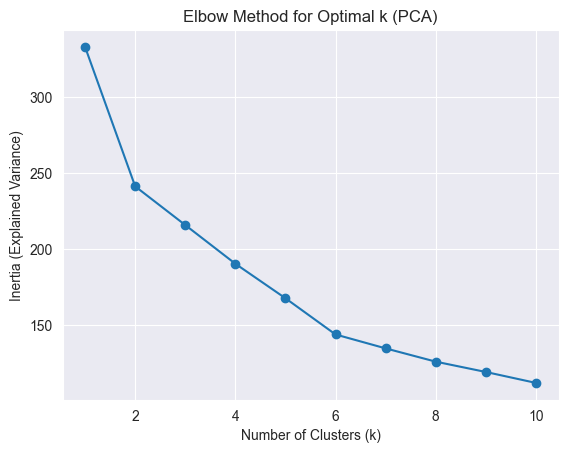

In [49]:
# Select features for K-means, excluding the 'country' column
features = pc_df.columns.difference(['country'])
data_for_kmeans = pc_df[features].values

# Define the range for the number of clusters
k_values = range(1, 11)

# Initialize a list to store the inertia values
inertia_values = []

# Run K-means for each value of k and compute inertia
for k in k_values:
    clusters, centroids = kmeans(data_for_kmeans, k)
    inertia = np.sum(np.min(np.linalg.norm(data_for_kmeans[:, np.newaxis] - centroids, axis=2), axis=1))
    inertia_values.append(inertia)

# Plot the inertia values using the Elbow method
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k (PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Explained Variance)')
plt.show()

### Results

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
در این مرحله نیاز است که نموداری بر اساس خوشه های خود همچنین دقت الگوریتم خود را به صورت نمودار و عددی نشان دهید.

</font>
</p>
</div> 

/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common

Inertia for 'inflation' and 'income': 668.4000126031588


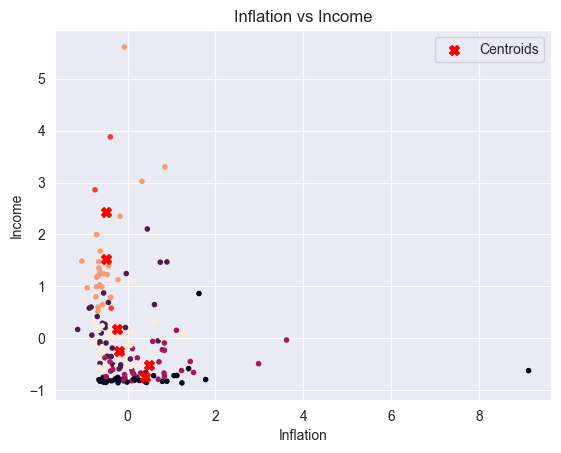

In [50]:
# Data Preparation and Scaling
features = country_df.columns.difference(['country'])
data_for_kmeans = country_df[features]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_kmeans)

# Apply K-means Clustering
k = 6
clusters, centroids = kmeans(scaled_data, k)

# Extract Specific Feature Data
inflation_data = scaled_data[:, 6] # Assuming 'inflation' is at index 6
income_data = scaled_data[:, 5]    # Assuming 'income' is at index 5

# Calculate Inertia
inertia = np.sum((inflation_data - centroids[:, 7][clusters]) ** 2 + 
                 (income_data - centroids[:, 6][clusters]) ** 2)
print("Inertia for 'inflation' and 'income':", inertia)

# Plot the Results
plt.scatter(inflation_data, income_data, c=clusters, marker='.',)
plt.scatter(centroids[:, 6], centroids[:, 5], marker='X', s=50, c='red', label='Centroids') 
plt.legend()
plt.title("Inflation vs Income")
plt.xlabel("Inflation")
plt.ylabel("Income")
plt.show()

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> نتایج به دست آمده بالا را با یکدیگر مقایسه کرده و نتیجه را توجیه کنید.
</font>
</p>
</div> 

Inertia: 146.17067744936887 


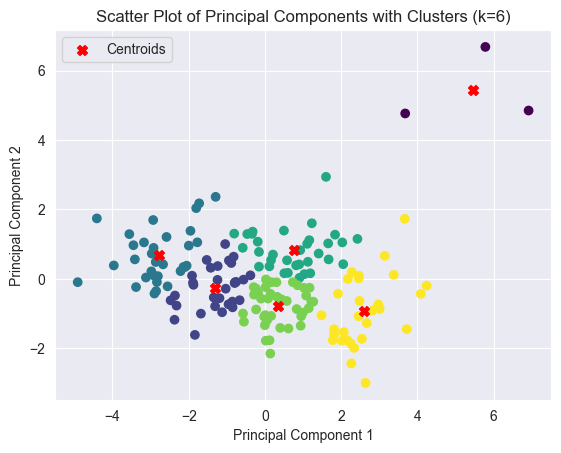

In [51]:
# Features selection
features = pc_df.columns.difference(['country'])
data_for_kmeans = pc_df[features].values

# Apply K-means Clustering
k = 6
clusters, centroids = kmeans(data_for_kmeans, k)

# Calculate Inertia
inertia = np.sum(np.min(np.linalg.norm(data_for_kmeans[:, np.newaxis] - centroids, axis=2), axis=1))
print(f'Inertia: {inertia} ')

# Plot Clusters and Centroids
plt.scatter(pc_df['PC1'], pc_df['PC2'], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=50, c='red', label='Centroids') 

plt.title('Scatter Plot of Principal Components with Clusters (k=6)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### DBSCAN

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
الگوریتم DBSCAN را بر هر دو داده کاهش داده شده و اصلی پساده سازی کنید.
    مجددا نمی توانید در اینجا از کتابخانه های آماده استفاده کنید.
</font>
</p>
</div>

/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common

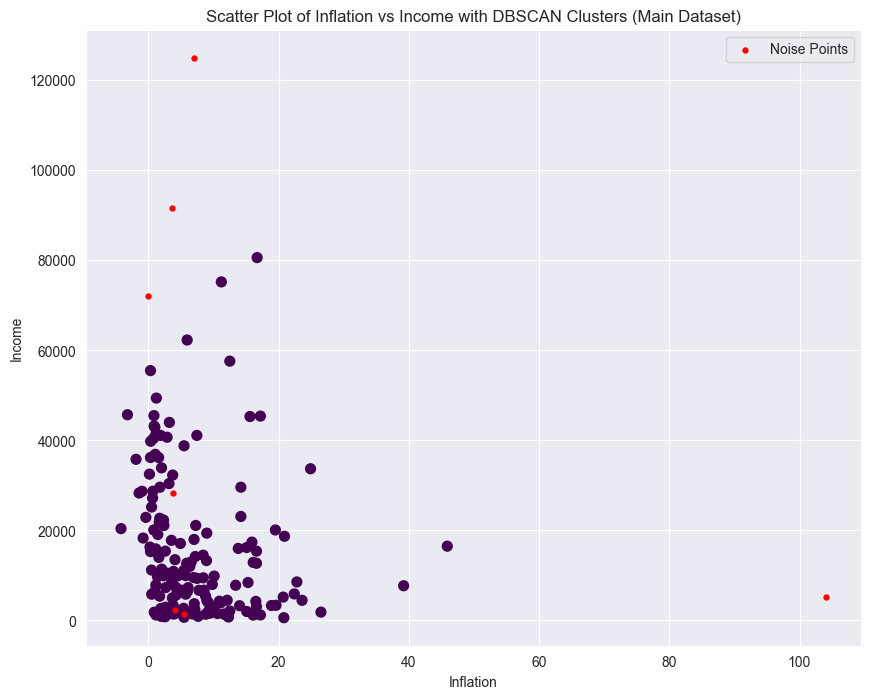

In [52]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=20)

# Data Preparation
features = country_df.columns.difference(['country'])
data_for_dbscan = country_df[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_dbscan)

# Apply DBSCAN
dbscan.fit(scaled_data)

# Assign Clusters to Data
country_df['Cluster'] = dbscan.labels_
noise_points = country_df[country_df['Cluster'] == -1]
labels = [x for x in dbscan.labels_ if x != -1]

# Visualize the Clusters
plt.figure(figsize=(10, 8))
plt.scatter(country_df[country_df['Cluster'] != -1]['inflation'], 
            country_df[country_df['Cluster'] != -1]['income'], 
            c=labels, cmap='viridis', s=50)
plt.scatter(noise_points['inflation'], noise_points['income'], 
            c='red', s=50, marker='.', label='Noise Points')
plt.legend()
plt.title('Scatter Plot of Inflation vs Income with DBSCAN Clusters (Main Dataset)')
plt.xlabel('Inflation')
plt.ylabel('Income')
plt.show()

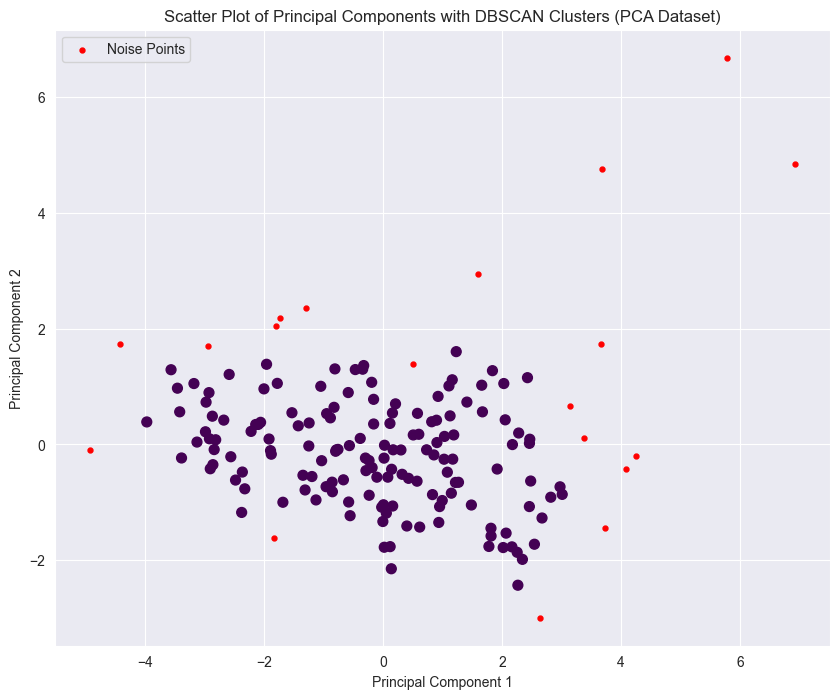

In [53]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=4)

# Data Preparation
features = pc_df.columns.difference(['country'])
data_for_dbscan = pc_df[features]
dbscan.fit(data_for_dbscan)

# Assign Clusters to Data
pc_df['Cluster'] = dbscan.labels_
noise_points = pc_df[pc_df['Cluster'] == -1]
labels = [x for x in dbscan.labels_ if x != -1]

# Visualize the Clusters
plt.figure(figsize=(10, 8))
plt.scatter(pc_df[pc_df['Cluster'] != -1]['PC1'], 
            pc_df[pc_df['Cluster'] != -1]['PC2'], 
            c=labels, cmap='viridis', s=50)
plt.scatter(noise_points['PC1'], 
            noise_points['PC2'], 
            c='red', s=50, marker='.', label='Noise Points')
plt.legend()
plt.title('Scatter Plot of Principal Components with DBSCAN Clusters (PCA Dataset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Results

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
در این مرحله نیاز است که نموداری بر اساس خوشه های خود همچنین دقت الگوریتم خود را به صورت نمودار و عددی نشان دهید.
همچنین مقادری بهینه minpts و eps را گزارش کنید.
</font>
</p>
</div> 

/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common

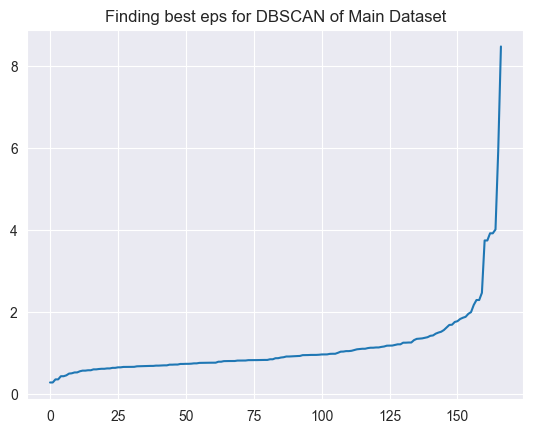

In [54]:
# Data Preparation
features = country_df.columns.difference(['country'])
data_for_dbscan = country_df[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_dbscan)

# Compute Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=19)
neighbors_fit = neighbors.fit(scaled_data)
distances, _ = neighbors_fit.kneighbors(scaled_data)

# Sort and Plot Distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Taking the distance to the first neighbor
plt.plot(distances)
plt.title("Finding best eps for DBSCAN of Main Dataset")
plt.show()

/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


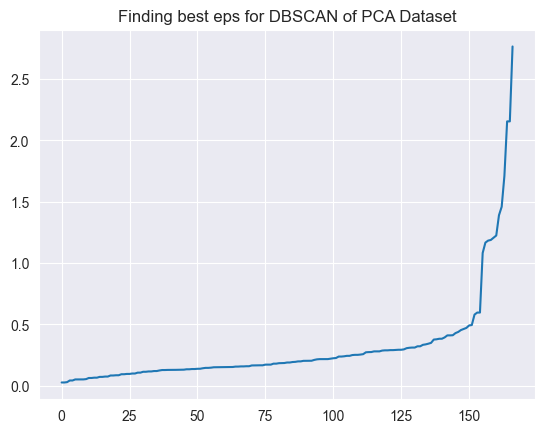

In [55]:
# Select features
features = pc_df.columns.difference(['country'])
data_for_dbscan = pc_df[features]

# Nearest Neighbors Calculation
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(data_for_dbscan)
distances, _ = neighbors_fit.kneighbors(data_for_dbscan)

# Sort and Plot Distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Taking the distance to the nearest neighbor
plt.plot(distances)
plt.title("Finding best eps for DBSCAN of PCA Dataset")
plt.show()

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
نتایج به دست آمده از مرحله قبل را با این مرحله مقایسه کرده و علت بهتر بودن الگوریتم بهینه را توجیه کنید
</font>
</p>
</div> 

/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common

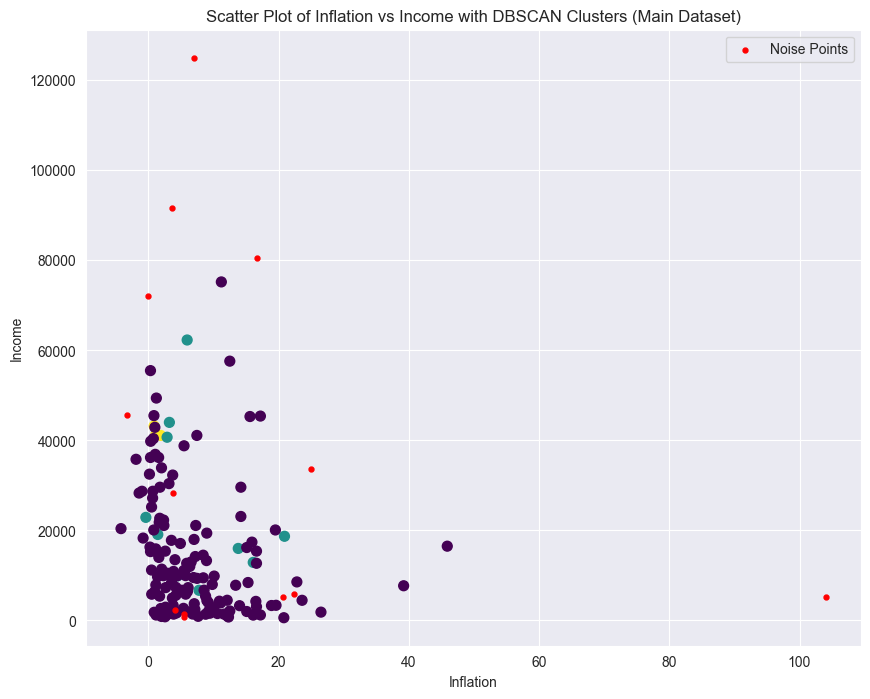

In [56]:
class Dbscan:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None

    @staticmethod
    def _euclidean_distance(point1, point2):
        return np.linalg.norm(point1 - point2)

    def _range_query(self, data, query_point):
        return [i for i, point in enumerate(data) if self._euclidean_distance(point, query_point) < self.eps]

    def _expand_cluster(self, data, cluster, point_index, neighbors):
        self.labels[point_index] = cluster
        i = 0
        while i < len(neighbors):
            neighbor_index = neighbors[i]
            if self.labels[neighbor_index] is None:
                self.labels[neighbor_index] = cluster
                new_neighbors = self._range_query(data, data[neighbor_index])
                if len(new_neighbors) >= self.min_samples:
                    neighbors = list(set(neighbors + new_neighbors))
            elif self.labels[neighbor_index] == -1:
                self.labels[neighbor_index] = cluster
            i += 1

    def fit(self, data):
        self.labels = [None] * len(data)
        cluster = 0

        for i, point in enumerate(data):
            if self.labels[i] is not None:
                continue

            neighbors = self._range_query(data, point)

            if len(neighbors) < self.min_samples:
                self.labels[i] = -1  # Noise point
            else:
                cluster += 1
                self._expand_cluster(data, cluster, i, neighbors)

    def get_labels(self):
        return self.labels

# Data Preparation and Scaling
features = country_df.columns.difference(['country'])
data_for_dbscan = country_df[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_dbscan)

# Apply DBSCAN
dbscan = Dbscan(eps=2.5, min_samples=20)
dbscan.fit(scaled_data)

# Visualization
country_df['Cluster'] = dbscan.get_labels()
noise_points = country_df[country_df['Cluster'] == -1]
labels = [x for x in country_df['Cluster'] if x != -1]

plt.figure(figsize=(10, 8))
plt.scatter(country_df[country_df['Cluster'] != -1]['inflation'], country_df[country_df['Cluster'] != -1]['income'], c=labels, cmap='viridis', s=50)
plt.scatter(noise_points['inflation'], noise_points['income'], c='red', s=50, marker='.', label='Noise Points')
plt.legend()
plt.title('Scatter Plot of Inflation vs Income with DBSCAN Clusters (Main Dataset)')
plt.xlabel('Inflation')
plt.ylabel('Income')
plt.show()

## Association rules

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
در این مرحله باید هر دو دیتا ست داده شده به شما را خوانده و سپس برای محموعه داده کوچکتر آستانه پشتیبانی و آستانه اطمینان را به صورت ورودی از کاربر گرفته و سپس تمام قوانین انجمنی معتبر را برای آن ها به دست آورید.
    برای مجموعه داده های بزرگتر نیز مجدد آستانه پشتنیبانی و اطمینان را دریافت کرده و 3 کالایی که بیشترین خرید را با هم داشته اند به دست آورید.
</font>
</p>
</div> 

In [57]:
# 1. Data Loading
small_grocery_df = pd.read_csv('GroceryStoreDataSet.csv', header=None)

# 2. Preprocess Data
transactions = [line[0].split(',') for index, line in small_grocery_df.iterrows()]

# 3. Apply TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 4. Generate Frequent Itemsets
min_sp = 0.1  # Minimum support threshold
frequent_itemsets = apriori(df_encoded, min_support=min_sp, use_colnames=True)

# 5. Generate Association Rules
min_conf = 0.2  # Minimum confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)

# 6. Display Rules
rules.sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
58,"(COCK, BISCUIT)",(CORNFLAKES),0.1,0.30,0.1,1.0,3.333333,0.070,inf,0.777778
44,(JAM),(MAGGI),0.1,0.25,0.1,1.0,4.000000,0.075,inf,0.833333
65,"(COFFEE, BISCUIT)",(CORNFLAKES),0.1,0.30,0.1,1.0,3.333333,0.070,inf,0.777778
87,"(MAGGI, JAM)",(BREAD),0.1,0.65,0.1,1.0,1.538462,0.035,inf,0.388889
98,"(COCK, CORNFLAKES)",(COFFEE),0.1,0.40,0.1,1.0,2.500000,0.060,inf,0.666667
53,"(COFFEE, BISCUIT)",(COCK),0.1,0.15,0.1,1.0,6.666667,0.085,inf,0.944444
88,"(BREAD, JAM)",(MAGGI),0.1,0.25,0.1,1.0,4.000000,0.075,inf,0.833333
22,(JAM),(BREAD),0.1,0.65,0.1,1.0,1.538462,0.035,inf,0.388889
102,"(COFFEE, COCK, BISCUIT)",(CORNFLAKES),0.1,0.30,0.1,1.0,3.333333,0.070,inf,0.777778
103,"(COFFEE, COCK, CORNFLAKES)",(BISCUIT),0.1,0.35,0.1,1.0,2.857143,0.065,inf,0.722222


In [58]:
# 1. Data Loading
big_grocery_df = pd.read_csv('Grocery Products Purchase.csv')

# 2. Preprocess Data
transactions = []
for row in big_grocery_df.values:
    temp = [item for item in row if not pd.isna(item)]
    transactions.append(temp)

# 3. Apply TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 4. Generate Frequent Itemsets
min_sp = 0.015  # Minimum support threshold
frequent_itemsets = apriori(df_encoded, min_support=min_sp, use_colnames=True)

# 5. Generate Association Rules
min_conf = 0.2  # Minimum confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)

# 6. Display Rules
rules.sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
114,"(tropical fruit, yogurt)",(whole milk),0.029283,0.255516,0.015150,0.517361,2.024770,0.007668,1.542528,0.521384
108,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,0.524577
14,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817,0.514659
27,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,0.012517,1.461085,0.505984
100,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687,0.501524
104,"(other vegetables, tropical fruit)",(whole milk),0.035892,0.255516,0.017082,0.475921,1.862587,0.007911,1.420556,0.480353
101,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320,0.622230
31,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030,0.490649
111,"(rolls/buns, yogurt)",(whole milk),0.034367,0.255516,0.015557,0.452663,1.771563,0.006775,1.360192,0.451027
92,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735,0.465077


In [59]:
# Assuming that 'frequent_itemsets' has been defined previously using the Apriori algorithm
itemsets_size_3 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)]
top_k_frequent_itemsets_size_3 = itemsets_size_3.sort_values(by='support', ascending=False).head(1)
top_k_frequent_itemsets_size_3

,support,itemsets
175,0.023183,"(root vegetables, other vegetables, whole milk)"
